In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
data_dir = './MP_image/weathered_MODA'

data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('MP_image/weathered_MODA')

In [3]:
before21 = list(data_dir.glob('before21/*'))

In [4]:
before21

[WindowsPath('MP_image/weathered_MODA/before21/before21_0_1058.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1114.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1132.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1184.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1222.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1263.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1264.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1283.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1336.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_135.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1350.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1381.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1394.tif'),
 WindowsPath('MP_image/weathered_MODA/before21/before21_0_1461.tif'),
 WindowsPath('MP_imag

In [5]:
MP_image_dict = {
    'before21': list(data_dir.glob('before21/*')),
    'after21': list(data_dir.glob('after21/*'))}

In [6]:
MP_label_dict={
    'before21': 0,
    'after21': 1
}

def center_crop(img, dim):
    """returns center cropped image
    Args: image scaling
    img: image to be center cropped
    dim: dimensions (width, height) to be cropped from center
    """
    width, height = img.shape[1], img.shape[0]
    #process crop width and height for max available dimension
    crop_width = dim[0] if dim[0] < img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
    
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2)
    crop_img = img[mid_y-ch2: mid_y+ch2, mid_x-cw2: mid_x+cw2]
    return crop_img

In [7]:
img_day0 = cv2.imread(str(before21[1]))
img_day0.shape

(2040, 3064, 3)

In [8]:
img=cv2.imread(str(MP_image_dict['before21'][0]))  # can convert image into three dimentianl pixel data
img.shape

(2040, 3064, 3)

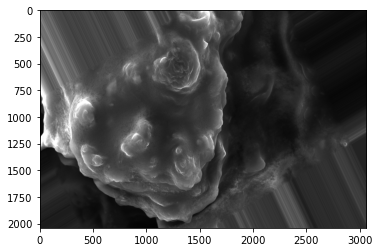

In [9]:
plt.imshow(img)

In [10]:
X ,y =[], []

for aged_days, images in MP_image_dict.items():
    for image in images:
        img = cv2.imread(str(image), 0)
        resized_image = cv2.resize(img, (224,224))
        X.append(resized_image)
        y.append(MP_label_dict[aged_days])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
import copy
Z=copy.deepcopy(X)

In [13]:
Z.shape

(983, 224, 224)

In [14]:
X.shape

(983, 224, 224)

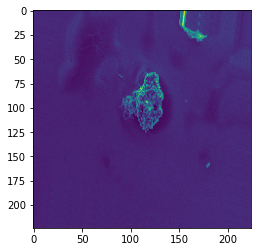

In [15]:
plt.imshow(X[2])

In [16]:
X[2].shape

(224, 224)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.25)

In [19]:
train_X=train_X.astype('float64')/255.0
test_X=test_X.astype('float64')/255.0

In [20]:
train_X = train_X.reshape(-1, 224, 224, 1)
test_X = test_X.reshape(-1, 224, 224, 1)

In [21]:
train_X.shape

(737, 224, 224, 1)

In [22]:
train_y.shape

(737,)

In [23]:
from keras. preprocessing.image import ImageDataGenerator, load_img, img_to_array 
####data augmentation###

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
rescale=1./255,
zoom_range=0.2,
horizontal_flip=True,
    vertical_flip=True,
fill_mode='nearest')

MP_types = os.listdir('./MP_image/weathered_MODA')
print(MP_types)
print('types of aged MP', len(MP_types))

In [65]:
import pandas as pd

aged_MP = []

for item in MP_types:
    all_mp = os.listdir('./MP_image/weathered_MODA' + '/' +item)
    for MP in all_mp:
        aged_MP.append((item, str('./MP_image/weathered_MODA' + '/' +item) + '/' + MP))
aged_MP
aged_MP_df = pd.DataFrame(data=aged_MP, columns=['days', 'images'])
print(aged_MP_df)

for image in aged_MP_df.loc[aged_MP_df['days'] == 'after21', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='./MP_image/weathered_MODA',
                              save_prefix='after21',
                           save_format='tif'):
        count +=1
        if count >10:
            break

for image in aged_MP_df.loc[aged_MP_df['days'] == 'before21', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='./MP_image/weathered_MODA',
                              save_prefix='before21',
                           save_format='tif'):
        count +=1
        if count >10:
            break

for image in aged_MP_df.loc[aged_MP_df['days'] == '42days', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='MP_image/generated_image_day42',
                              save_prefix='day42',
                           save_format='tif'):
        count +=1
        if count >10:
            break

for image in aged_MP_df.loc[aged_MP_df['days'] == '56days', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='MP_image/generated_image_day56',
                              save_prefix='day56',
                           save_format='tif'):
        count +=1
        if count >10:
            break

for image in aged_MP_df.loc[aged_MP_df['days'] == '0days', 'images']:
    img=load_img(image)
    img_ary=np.array(img)
    img_array=np.expand_dims(img_ary, axis=0)
    #generate 10 images for example
    #batch_size: at a time, how many images should be created
    count=0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir='MP_image/generated_image_day0',
                              save_prefix='day0',
                           save_format='tif'):
        count +=1
        if count >10:
            break

# From first image loading method

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [25]:
X = X.reshape(-1, 224, 224, 1)

In [26]:
X.shape

(983, 224, 224, 1)

In [32]:
model = Sequential([
        layers.Conv2D(16,kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,1)),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Conv2D(128,kernel_size=(3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        layers.Flatten(),
        layers.Dense(2)])

In [33]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])#loss function is because the result is exact value and is not hot encoded values

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
import time, datetime
start = datetime.datetime.now()
model.fit(train_X,train_y,validation_data=(test_X,test_y),
          callbacks=[monitor],verbose=2,epochs=1000)
end = datetime.datetime.now()
diff = (end - start)

Epoch 1/1000
24/24 - 1s - loss: 0.9424 - accuracy: 0.6038 - val_loss: 0.6931 - val_accuracy: 0.4390
Epoch 2/1000
24/24 - 1s - loss: 0.6931 - accuracy: 0.3650 - val_loss: 0.6931 - val_accuracy: 0.3699
Epoch 3/1000
24/24 - 1s - loss: 0.6931 - accuracy: 0.3677 - val_loss: 0.6931 - val_accuracy: 0.3740
Epoch 4/1000
24/24 - 1s - loss: 0.6931 - accuracy: 0.3691 - val_loss: 0.6931 - val_accuracy: 0.3740
Epoch 5/1000
24/24 - 1s - loss: 0.6931 - accuracy: 0.3691 - val_loss: 0.6931 - val_accuracy: 0.3740
Epoch 6/1000
24/24 - 1s - loss: 0.6931 - accuracy: 0.3691 - val_loss: 0.6931 - val_accuracy: 0.3740
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


history = model.fit(X, y, validation_split=0.2, epochs=150, verbose=0, batch_size=4)
print(history.history.keys())

history.history['accuracy']

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
diff

datetime.timedelta(seconds=4, microseconds=767927)

In [36]:
model.evaluate(test_X, test_y)

10/10 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.6081


[0.6931471824645996, 0.6081081032752991]

model.save('Customzied_CNN.h5')

# VGG16 orginal

In [30]:
 model = Sequential([
    layers.Conv2D(input_shape=(224,224,1), filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
     layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='softmax')])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 256)      

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
import time, datetime
start = datetime.datetime.now()
model.fit(train_X,train_y,validation_data=(test_X,test_y),
          callbacks=[monitor],verbose=2,epochs=1000)
end = datetime.datetime.now()
diff = (end - start)

Epoch 1/1000
70/70 - 36s - loss: 0.6937 - acc: 0.5422 - val_loss: 0.6899 - val_acc: 0.5416
Epoch 2/1000
70/70 - 20s - loss: 0.6902 - acc: 0.5422 - val_loss: 0.6899 - val_acc: 0.5416
Epoch 3/1000
70/70 - 20s - loss: 0.6904 - acc: 0.5422 - val_loss: 0.6900 - val_acc: 0.5416
Epoch 4/1000
70/70 - 20s - loss: 0.6897 - acc: 0.5422 - val_loss: 0.6898 - val_acc: 0.5416
Epoch 5/1000
70/70 - 20s - loss: 0.6898 - acc: 0.5422 - val_loss: 0.6898 - val_acc: 0.5416
Epoch 6/1000
70/70 - 21s - loss: 0.6900 - acc: 0.5422 - val_loss: 0.6897 - val_acc: 0.5416
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [51]:
end-start

datetime.timedelta(seconds=64, microseconds=778446)

end-start
model.save('VGG16_WOT.h5')

# transfer learning from Resnet50

In [39]:
from keras.applications.resnet50 import ResNet50

import tensorflow_hub as hub
import urllib

feature_extractor_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'
pretrain_model_without_top_layer=hub.KerasLayer(feature_extractor_model, input_shape=(224,224,3), trainable=False) 
#trainable=false is freeze the hiddent layers,basically all the layers except the output layer

X.shape

In [40]:
rgb_X = np.repeat(Z[..., np.newaxis], 3, -1)

In [41]:
rgb_X.shape

(1183, 224, 224, 3)

In [42]:
train_X, test_X, train_y, test_y = train_test_split(rgb_X, y,stratify=y, 
                                                    test_size=0.25)

In [43]:
train_X.shape

(887, 224, 224, 3)

num_MP =2
model1 = tf.keras.Sequential([
pretrain_model_without_top_layer,layers.Flatten(),
tf.keras.layers.Dense(num_MP,activation='softmax')])
    
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])
    

model1.summary()

In [44]:
train_y.shape
train_X.shape

(887, 224, 224, 3)

import time, datetime
start = datetime.datetime.now()
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model1.fit(train_X,train_y,validation_data=(test_X,test_y),
          callbacks=[monitor],verbose=2,epochs=1000)
end = datetime.datetime.now()

preds = model.evaluate(test_X, test_y)
print('loss ='+ str(preds[
                    0]))
print('test accuracy =' + str(
      preds[1]))

end-start

In [45]:
IMAGE_SHAPE =(224,224)

In [46]:
resnet = ResNet50(input_shape=IMAGE_SHAPE+(3,), weights ='imagenet', include_top=False)

In [47]:
for layer in resnet.layers:
    layer.trainable = False

In [48]:
from keras.layers import Input, Lambda, Dense, Flatten
num_MP =2
x = Flatten()(resnet.output)
prediction = Dense((num_MP), activation='softmax')(x)

In [49]:
from keras.models import Model
model3=Model(inputs=resnet.input, outputs=prediction)
    

model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [50]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [51]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
import time, datetime
start = datetime.datetime.now()
model3.fit(train_X,train_y,validation_data=(test_X,test_y),
          callbacks=[monitor],verbose=2,epochs=1000)
end = datetime.datetime.now()
diff = (end - start)

Epoch 1/1000
28/28 - 7s - loss: 4.1994 - acc: 0.8061 - val_loss: 1.6004 - val_acc: 0.8851
Epoch 2/1000
28/28 - 2s - loss: 0.3892 - acc: 0.9684 - val_loss: 0.5398 - val_acc: 0.9595
Epoch 3/1000
28/28 - 2s - loss: 3.2924e-04 - acc: 1.0000 - val_loss: 0.5451 - val_acc: 0.9561
Epoch 4/1000
28/28 - 2s - loss: 0.0191 - acc: 0.9977 - val_loss: 0.5961 - val_acc: 0.9527
Epoch 5/1000
28/28 - 2s - loss: 1.3112e-04 - acc: 1.0000 - val_loss: 0.6015 - val_acc: 0.9561
Epoch 6/1000
28/28 - 2s - loss: 8.3090e-06 - acc: 1.0000 - val_loss: 0.5996 - val_acc: 0.9561
Epoch 7/1000
28/28 - 2s - loss: 6.0466e-06 - acc: 1.0000 - val_loss: 0.5973 - val_acc: 0.9561
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping


In [52]:
end-start

datetime.timedelta(seconds=21, microseconds=220756)

model3.save('ResNet50_WT.h5')

# transfer from VGG16

In [53]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [54]:
vgg = VGG16(input_shape=IMAGE_SHAPE+(3,), weights ='imagenet', include_top=False)

In [55]:
for layer in vgg.layers:
    layer.trainable=False

In [56]:
model2=keras.Sequential([vgg,
                        keras.layers.Flatten(),
                        keras.layers.Dense(256, activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(2,activation='softmax')])
    

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [57]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [58]:
start = datetime.datetime.now()
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model2.fit(train_X,train_y,validation_data=(test_X,test_y),
          callbacks=[monitor],verbose=2,epochs=1000)
end = datetime.datetime.now()

Epoch 1/1000
28/28 - 4s - loss: 3.7926 - acc: 0.7080 - val_loss: 0.4434 - val_acc: 0.8345
Epoch 2/1000
28/28 - 3s - loss: 0.3928 - acc: 0.8974 - val_loss: 0.4740 - val_acc: 0.8615
Epoch 3/1000
28/28 - 3s - loss: 0.1215 - acc: 0.9662 - val_loss: 0.6199 - val_acc: 0.9155
Epoch 4/1000
28/28 - 3s - loss: 0.1853 - acc: 0.9763 - val_loss: 0.7222 - val_acc: 0.9155
Epoch 5/1000
28/28 - 3s - loss: 0.0353 - acc: 0.9921 - val_loss: 0.9515 - val_acc: 0.9122
Epoch 6/1000
28/28 - 3s - loss: 0.0229 - acc: 0.9921 - val_loss: 0.5421 - val_acc: 0.9054
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [59]:
end-start

datetime.timedelta(seconds=17, microseconds=656933)

model2.save('VGG16.h5')

# LIME explanations

(224, 224, 3)

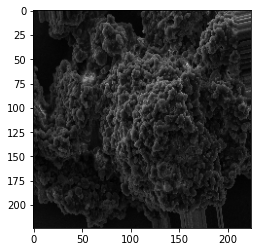

In [149]:
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings
Xi = test_X[2]
plt.imshow(Xi)
Xi.shape

In [150]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [153]:
preds = model2.predict(Xi[np.newaxis,:,:,:])

In [154]:
top_pred_classes = preds[0].argsort()[-2:][::-1]
top_pred_classes                #Index of top 5 classes

array([1, 0], dtype=int64)

# step 1: create perturbation of image

extract super-pixels from image

In [155]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

29

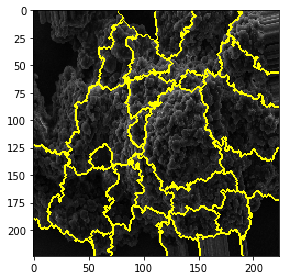

In [156]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi, superpixels))

create random perturbation

In [157]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

The following function perturb_image perturbs the given image (img) based on a perturbation vector (perturbation) and predefined superpixels (segments).

In [158]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

C:\Users\cheny\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


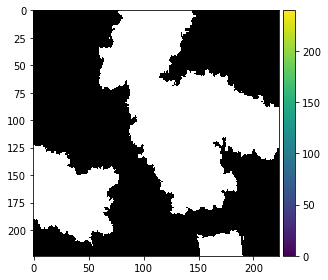

In [159]:
skimage.io.imshow(perturb_image(Xi,perturbations[0],superpixels))

# Step 2: Using ML classifier to predict classes of new generated images(VGG16)

In [160]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = model3.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

(150, 1, 2)

# Step3: Compute distances between the original image and each of the perturbed images and compute weights (importance) of each perturbed image

The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. For the shape of the distances array it can be noted that, as expected, there is a distance for every generated perturbation.

In [161]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)

Use kernel function to compute weights
The distances are then mapped to a value between zero and one (weight) using a kernel function. An example of a kernel function with different kernel widths is shown in the plot below. Here the x axis represents distances and the y axis the weights. Depeding on how we set the kernel width, it defines how wide we want the "locality" around our instance to be. This kernel width can be set based on expected distance values. For the case of cosine distances, we expect them to be somehow stable (between 0 and 1); therefore, no fine tunning of the kernel width might be required.

![title](kernel.png)

In [162]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

# Step4: Use perturbations, predictions and weights to fit an explainable(linear) model

A weighed linear regression model is fitted using data from the previous steps (perturbations, predictions and weights). Given that the class that we want to explain is prestine MP, when fitting the linear model we take from the predictions vector only the column corresponding to the top predicted class. Each coefficients in the linear model corresponds to one superpixel in the segmented image. These coefficients represent how important is each superpixel for the prediction of MP type.

In [163]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([0.038, -0.150, -0.012, -0.108, -0.234, 0.342, -0.017, -0.032,
       -0.085, -0.087, -0.100, -0.070, 0.377, 0.009, -0.012, -0.082,
       -0.179, 0.140, 0.097, 0.050, 0.033, 0.053, 0.130, 0.017, 0.146,
       0.021, -0.026, -0.068, 0.136])

In [164]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([17, 24,  5, 12], dtype=int64)

C:\Users\cheny\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


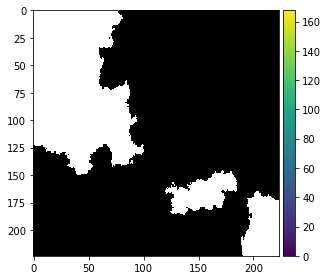

In [165]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi,mask,superpixels) )

# RES50

In [166]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = model3.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

(150, 1, 2)

In [167]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([0.038, -0.150, -0.012, -0.108, -0.234, 0.342, -0.017, -0.032,
       -0.085, -0.087, -0.100, -0.070, 0.377, 0.009, -0.012, -0.082,
       -0.179, 0.140, 0.097, 0.050, 0.033, 0.053, 0.130, 0.017, 0.146,
       0.021, -0.026, -0.068, 0.136])

In [168]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([17, 24,  5, 12], dtype=int64)

C:\Users\cheny\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


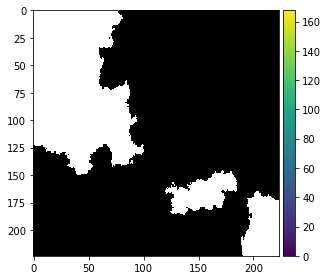

In [169]:
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi,mask,superpixels) )

In [170]:
test_y.shape

(246,)

In [171]:
import sklearn.metrics as metrics

y_pred_ohe = model2.predict(test_X)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

cm = metrics.confusion_matrix(y_true=test_y, y_pred=y_pred_labels)  # shape=(12, 12)

In [172]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='antialiased', cmap=cmap)
    
    plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    length=0, width=0)
    
    font = {'family' : 'normal',
        'size'   : 22}
    params = {'legend.fontsize': 'x-small',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
    pylab.rcParams.update(params)

    plt.rc('font', **font)
    plt.colorbar()
    
    

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

   
   

Normalized confusion matrix
[[0.870 0.130]
 [0.123 0.877]]


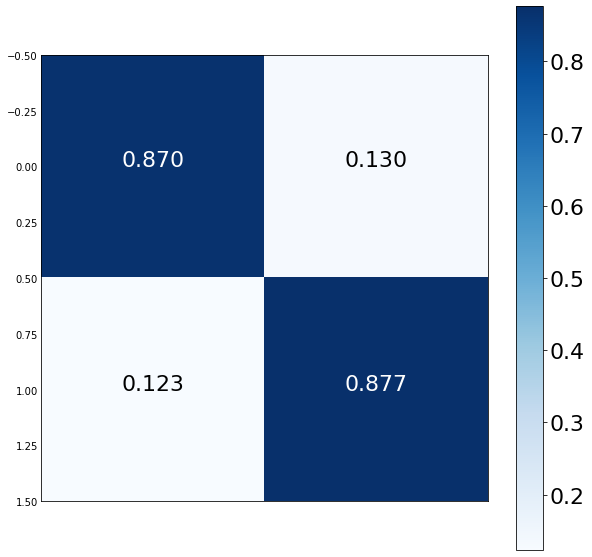

In [173]:
classes=['before21', 'after21']
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes)

Normalized confusion matrix
[[0.946 0.054]
 [0.032 0.968]]


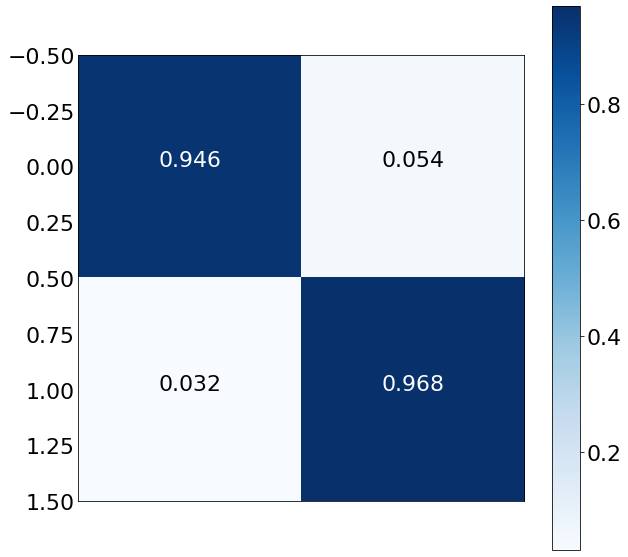

In [174]:
y_pred_ohe = model3.predict(test_X)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

cm = metrics.confusion_matrix(y_true=test_y, y_pred=y_pred_labels)  # shape=(12, 12)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes)